Obtain the Washington Geological Survey Landslide data from the official website: https://dnr.wa.gov/washington-geological-survey/geologic-hazards-and-environment/landslides

Create a directory 'Data' in your projects root folder and place the downloaded files inside it.

# Inspect the Layers in the GDB Dataset

In [3]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


gdb_dir = "../data/Washington/ger_portal_landslides_ds29_v1.4_Apr2024/WGS_Landslides.gdb"

layers = fiona.listlayers(gdb_dir)
print("Layers in geodatabase:")
for lyr in layers:
    print("  -", lyr)


Layers in geodatabase:
  - scarp_and_flank
  - rock_fall_deposit
  - rock_fall_scarp
  - recent_landslide_point
  - SLIP_fans
  - landslide_compilation_study_footprints
  - study_areas
  - SLIP_landslide
  - fan
  - landslide_deposit
  - landslide_compilation
  - scarp


In [4]:
df = gpd.read_file(gdb_dir, layer="landslide_deposit")

print(f"{'landslide_deposit':35s} {len(df):6d} data points")

landslide_deposit                    15060 data points


/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


# Landslide Deposit Inspection

## Initial Inspection

In [5]:
deposits = gpd.read_file(gdb_dir, layer="landslide_deposit")

/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


In [6]:
print("Total deposits:", len(deposits))

Total deposits: 15060


In [7]:
# Basic info
print(deposits.shape)      # (n_deposits, n_fields)
print(deposits.dtypes)     # field names and types

(15060, 23)
LANDSLIDE_ID                        int32
MATERIAL                           object
MOVEMENT                           object
MOVE_CODE                          object
CONFIDENCE                         object
RELATIVE_AGE                       object
YEAR_MOVE                          object
FIELD_VERIFIED                     object
SLOPE_DEG                           int16
HS_HEIGHT_FT                      float64
FAIL_DEPTH_FT                     float64
MVMT_AZIMUTH_DEG                  float32
VOLUME_FT3                        float64
AVG_SCARP_DIST_FT                 float64
LS_NAME                            object
COMMENTS                           object
DISPLAY_ON_PORTAL                  object
CHANGE_TYPE                        object
CHANGE_DATE           datetime64[ms, UTC]
CHANGE_DESCRIPTION                 object
Shape_Length                      float64
Shape_Area                        float64
geometry                         geometry
dtype: object


In [8]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

print(completeness(deposits))


                    non_null  % filled
LANDSLIDE_ID           15060     100.0
MATERIAL               15060     100.0
MOVEMENT               15060     100.0
MOVE_CODE              15060     100.0
CONFIDENCE             15060     100.0
RELATIVE_AGE           15060     100.0
YEAR_MOVE                458       3.0
FIELD_VERIFIED         15060     100.0
SLOPE_DEG              15060     100.0
HS_HEIGHT_FT           15055     100.0
FAIL_DEPTH_FT          15055     100.0
MVMT_AZIMUTH_DEG       15060     100.0
VOLUME_FT3             15055     100.0
AVG_SCARP_DIST_FT       1727      11.5
LS_NAME                   50       0.3
COMMENTS                6540      43.4
DISPLAY_ON_PORTAL      15060     100.0
CHANGE_TYPE              659       4.4
CHANGE_DATE              659       4.4
CHANGE_DESCRIPTION       659       4.4
Shape_Length           15060     100.0
Shape_Area             15060     100.0
geometry               15060     100.0


In [9]:
import pandas as pd
current_max_columns = pd.get_option('display.max_columns')
print(current_max_columns)
pd.set_option('display.max_columns', 40)

20


In [10]:
deposits.head(3)           # view first few rows


,LANDSLIDE_ID,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,RELATIVE_AGE,YEAR_MOVE,FIELD_VERIFIED,SLOPE_DEG,HS_HEIGHT_FT,FAIL_DEPTH_FT,MVMT_AZIMUTH_DEG,VOLUME_FT3,AVG_SCARP_DIST_FT,LS_NAME,COMMENTS,DISPLAY_ON_PORTAL,CHANGE_TYPE,CHANGE_DATE,CHANGE_DESCRIPTION,Shape_Length,Shape_Area,geometry
0,18414,Earth or debris,Flow,EFL,Low (1-10),Pre-historic (>150 years),None,No,11,3.0,3.0,225.0,1322.894339,NaN,None,None,Yes,None,NaT,None,82.334854,440.966914,"MULTIPOLYGON (((1043516.638 614643.978, 104351..."
1,20629,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),None,No,39,11.0,9.0,180.0,4039.516598,NaN,None,None,Yes,None,NaT,None,77.534531,441.695598,MULTIPOLYGON (EMPTY)
2,20630,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),None,No,37,11.0,9.0,180.0,4563.138478,NaN,None,None,Yes,None,NaT,None,81.931760,483.669276,MULTIPOLYGON (EMPTY)


In [11]:
deposits.tail(5)

,LANDSLIDE_ID,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,RELATIVE_AGE,YEAR_MOVE,FIELD_VERIFIED,SLOPE_DEG,HS_HEIGHT_FT,FAIL_DEPTH_FT,MVMT_AZIMUTH_DEG,VOLUME_FT3,AVG_SCARP_DIST_FT,LS_NAME,COMMENTS,DISPLAY_ON_PORTAL,CHANGE_TYPE,CHANGE_DATE,CHANGE_DESCRIPTION,Shape_Length,Shape_Area,geometry
15055,3289,Earth or debris,Complex,ES-T+ES-R+EFL,High (30-40),Historic (</=150 years),None,Yes,36,384.0,311.0,202.5,4.294517e+10,286.0,None,<Null>,Yes,None,NaT,None,68798.690812,1.380874e+08,"MULTIPOLYGON (((1317666.224 140753.422, 131753..."
15056,9528,Rock,Avalanche,RA+EA,High (30-40),Pre-historic (>150 years),None,No,21,4400.0,4108.0,180.0,6.181578e+11,NaN,Church Mountain Sturzstrom,,Yes,None,NaT,None,88435.134856,1.504766e+08,"MULTIPOLYGON (((1291247.844 1299997.055, 12912..."
15057,3828,Earth or debris,Complex,ES-T+ES-R+EFL,High (30-40),Pre-historic (>150 years),None,Yes,30,850.0,736.0,135.0,1.272854e+11,NaN,Bonneville Landslide,<Null>,Yes,None,NaT,None,70088.566952,1.729295e+08,"MULTIPOLYGON (((1267458.526 122066.123, 126747..."
15058,3829,Earth or debris,Complex,ES-T+ES-R+EFL,High (30-40),Pre-historic (>150 years),None,Yes,30,850.0,736.0,135.0,1.533283e+11,NaN,Red Bluffs Landslide,<Null>,Yes,Modified,2023-11-16 00:00:29+00:00,Modified slide extent based on interpretation ...,71284.621148,2.083264e+08,"MULTIPOLYGON (((1277596.73 140054.257, 1277621..."
15059,3623,Earth or debris,Complex,ES-R+ES-T+EFL,High (30-40),Pre-historic (>150 years),None,Yes,25,420.0,381.0,157.5,9.506693e+10,345.0,None,<Null>,Yes,None,NaT,None,80729.607542,2.495195e+08,"MULTIPOLYGON (((1230679.177 110818.484, 123063..."


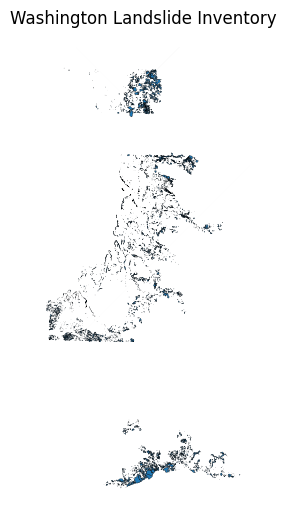

In [12]:
deposits.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("Washington Landslide Inventory")
plt.axis("off")
plt.show()

## Numerical Analysis

In [13]:
# Seperating deposits by column types
numerical_cols = deposits.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = deposits.select_dtypes(exclude=['number']).columns.tolist()

In [14]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:
  - LANDSLIDE_ID
  - SLOPE_DEG
  - HS_HEIGHT_FT
  - FAIL_DEPTH_FT
  - MVMT_AZIMUTH_DEG
  - VOLUME_FT3
  - AVG_SCARP_DIST_FT
  - Shape_Length
  - Shape_Area

Non-Numerical Columns:
  - MATERIAL
  - MOVEMENT
  - MOVE_CODE
  - CONFIDENCE
  - RELATIVE_AGE
  - YEAR_MOVE
  - FIELD_VERIFIED
  - LS_NAME
  - COMMENTS
  - DISPLAY_ON_PORTAL
  - CHANGE_TYPE
  - CHANGE_DATE
  - CHANGE_DESCRIPTION
  - geometry


In [15]:
print("\nStatistical summary for Numerical data:")
numerical_stats = deposits[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                           min           max          mean           std
LANDSLIDE_ID          1.000000  2.098000e+04  1.109971e+04  5.832265e+03
SLOPE_DEG             4.000000  7.300000e+01  2.931282e+01  8.884840e+00
HS_HEIGHT_FT          1.000000  4.400000e+03  4.977463e+01  6.563302e+01
FAIL_DEPTH_FT         1.000000  4.108000e+03  4.238851e+01  5.686408e+01
MVMT_AZIMUTH_DEG      0.000000  3.600000e+02  1.935583e+02  1.019564e+02
VOLUME_FT3         1322.894339  6.181578e+11  1.499361e+08  5.403177e+09
AVG_SCARP_DIST_FT     4.000000  2.183000e+03  1.321841e+02  1.622443e+02
Shape_Length         77.534531  8.843513e+04  2.370590e+03  3.649655e+03
Shape_Area          440.966914  2.495195e+08  7.131126e+05  4.714340e+06


In [16]:
# Avoiding scientific notation 
# Set the display format to use commas and have 2 decimal places
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [17]:
print("\nStatistical summary for Numerical data:")
numerical_stats = deposits[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                       min                max           mean              std
LANDSLIDE_ID          1.00          20,980.00      11,099.71         5,832.27
SLOPE_DEG             4.00              73.00          29.31             8.88
HS_HEIGHT_FT          1.00           4,400.00          49.77            65.63
FAIL_DEPTH_FT         1.00           4,108.00          42.39            56.86
MVMT_AZIMUTH_DEG      0.00             360.00         193.56           101.96
VOLUME_FT3        1,322.89 618,157,820,433.16 149,936,074.16 5,403,177,315.34
AVG_SCARP_DIST_FT     4.00           2,183.00         132.18           162.24
Shape_Length         77.53          88,435.13       2,370.59         3,649.65
Shape_Area          440.97     249,519,456.15     713,112.56     4,714,339.74


## Non Numerical Analysis

In [18]:
categorical_cols = deposits.select_dtypes(exclude=['number']).columns

print("Value counts for categorical columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    cat_counts = deposits[col].value_counts(dropna=False)
    print(cat_counts)

Value counts for categorical columns:

--- MATERIAL ---
MATERIAL
Earth or debris    14712
Rock                 348
Name: count, dtype: int64

--- MOVEMENT ---
MOVEMENT
Complex                8089
Slide-Rotational       2796
Flow                   2522
Slide-Translational    1559
Avalanche                49
Topple                   36
Spread                    9
Name: count, dtype: int64

--- MOVE_CODE ---
MOVE_CODE
ES-R+EFL       4398
ES-R           2723
EFL            2495
ES-T           1465
ES-R+ES-T      1233
               ... 
RT+RS-T+RFL       1
EA+ES-R           1
EFL+ESR           1
ES-T+RF           1
RA+EA             1
Name: count, Length: 121, dtype: int64

--- CONFIDENCE ---
CONFIDENCE
Moderate (11-29)    7404
Low (1-10)          4719
High (30-40)        2937
Name: count, dtype: int64

--- RELATIVE_AGE ---
RELATIVE_AGE
Pre-historic (>150 years)    13892
Historic (</=150 years)       1168
Name: count, dtype: int64

--- YEAR_MOVE ---
YEAR_MOVE
None    14602
2009      100
20

In [19]:
print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")


Non-Numerical Columns:
  - MATERIAL
  - MOVEMENT
  - MOVE_CODE
  - CONFIDENCE
  - RELATIVE_AGE
  - YEAR_MOVE
  - FIELD_VERIFIED
  - LS_NAME
  - COMMENTS
  - DISPLAY_ON_PORTAL
  - CHANGE_TYPE
  - CHANGE_DATE
  - CHANGE_DESCRIPTION
  - geometry


In [20]:
non_numerical_df = df[non_numerical_cols]  # Subset the DataFrame with non-numerical columns

# Print completeness for just non-numerical columns
print("\nCompleteness of Non-Numerical Columns:")
print(completeness(non_numerical_df))


Completeness of Non-Numerical Columns:
                    non_null  % filled
MATERIAL               15060    100.00
MOVEMENT               15060    100.00
MOVE_CODE              15060    100.00
CONFIDENCE             15060    100.00
RELATIVE_AGE           15060    100.00
YEAR_MOVE                458      3.00
FIELD_VERIFIED         15060    100.00
LS_NAME                   50      0.30
COMMENTS                6540     43.40
DISPLAY_ON_PORTAL      15060    100.00
CHANGE_TYPE              659      4.40
CHANGE_DATE              659      4.40
CHANGE_DESCRIPTION       659      4.40
geometry               15060    100.00


### Material

In [12]:
print("\nValue counts for 'MATERIAL':")
print(deposits['MATERIAL'].value_counts())


Value counts for 'MATERIAL':
MATERIAL
Earth or debris    14712
Rock                 348
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14171/3099790130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=material_counts.index, y=material_counts.values, palette='coolwarm')


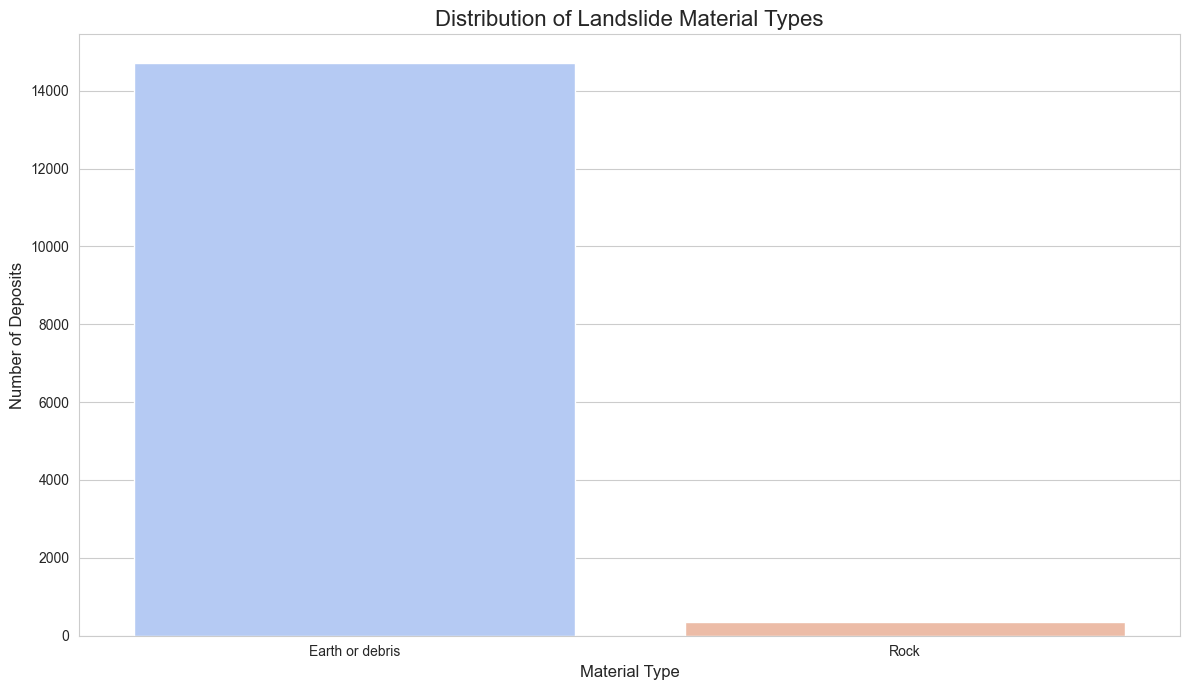

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7)) 

material_counts = deposits['MATERIAL'].value_counts()

sns.barplot(x=material_counts.index, y=material_counts.values, palette='coolwarm')

plt.title('Distribution of Landslide Material Types', fontsize=16)
plt.xlabel('Material Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Movement

In [34]:
print("\nValue counts for 'MOVEMENT':")
print(deposits['MOVEMENT'].value_counts())


Value counts for 'MOVEMENT':
MOVEMENT
Complex                8089
Slide-Rotational       2796
Flow                   2522
Slide-Translational    1559
Avalanche                49
Topple                   36
Spread                    9
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_48675/4064240954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movement_counts.index, y=movement_counts.values, palette='plasma')


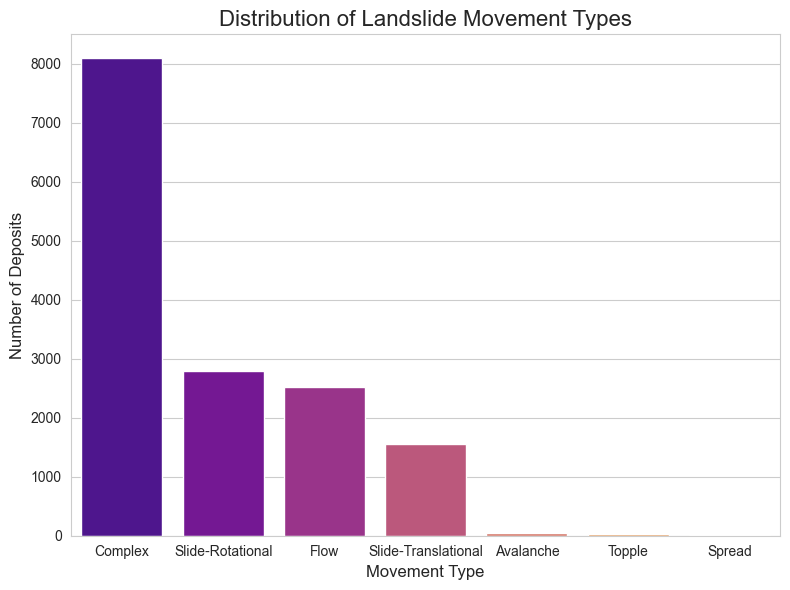

In [35]:
movement_counts = deposits['MOVEMENT'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=movement_counts.index, y=movement_counts.values, palette='plasma')

plt.title('Distribution of Landslide Movement Types', fontsize=16)
plt.xlabel('Movement Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Move Code

In [37]:
print("\nValue counts for 'MOVE_CODE':")
print(deposits['MOVE_CODE'].value_counts())


Value counts for 'MOVE_CODE':
MOVE_CODE
ES-R+EFL       4398
ES-R           2723
EFL            2495
ES-T           1465
ES-R+ES-T      1233
               ... 
RT+RS-T+RFL       1
EA+ES-R           1
EFL+ESR           1
ES-T+RF           1
RA+EA             1
Name: count, Length: 121, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_48675/1270386772.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=move_code_counts.index, y=move_code_counts.values, palette='crest')


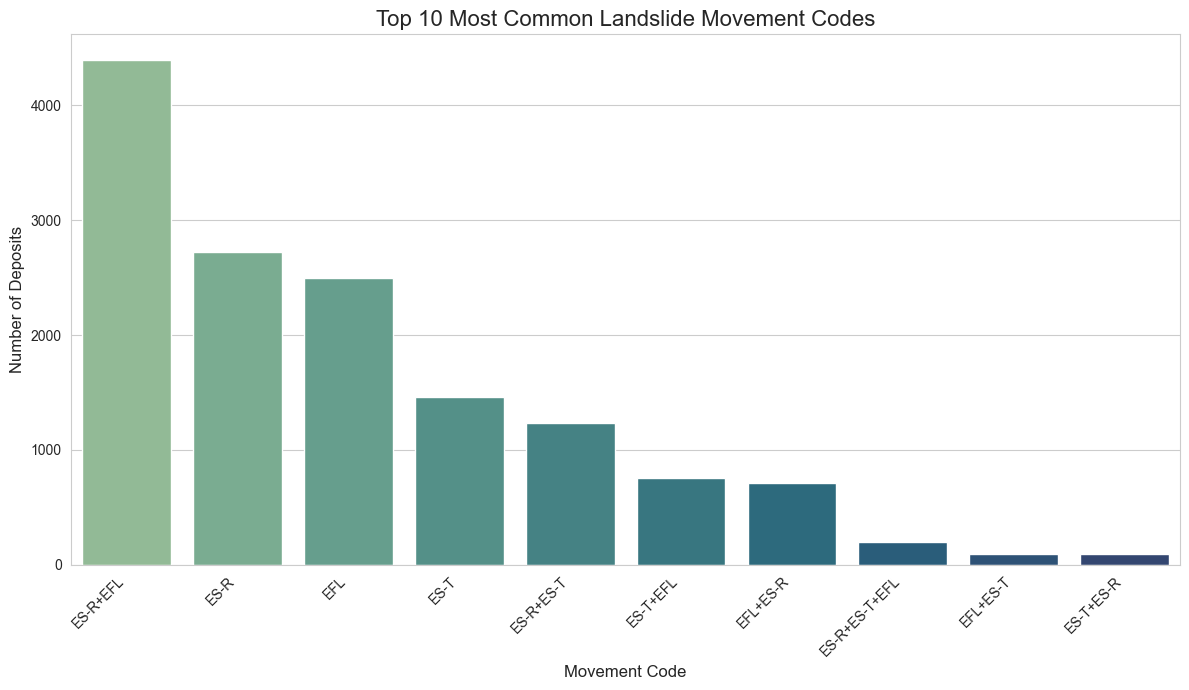

In [38]:
# There are 121 unique movement codes, so we will focus on the top 10 most common ones for visualization.
# Plot for Top 10 MOVE_CODE
plt.figure(figsize=(12, 7))

# Get the counts for the top 10 most frequent movement codes
move_code_counts = deposits['MOVE_CODE'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=move_code_counts.index, y=move_code_counts.values, palette='crest')

# Add titles and labels
plt.title('Top 10 Most Common Landslide Movement Codes', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split on '+' and explode into one code per row
deposits_exploded = deposits.copy()
deposits_exploded['MOVE_CODE'] = deposits_exploded['MOVE_CODE'].str.split(r'\+')
deposits_exploded = deposits_exploded.explode('MOVE_CODE')

In [ ]:
# 2. Now count each code (composites have contributed to each part)
move_code_counts = deposits_exploded['MOVE_CODE'].value_counts()

In [16]:
print(move_code_counts)

MOVE_CODE
ES-R            9629
EFL             8964
ES-T            4083
RS-R             174
RS-T             165
ET                90
EF                89
DA                78
RFL               70
RT                49
ES-R              48
RA                28
EFL               18
EA                16
ESP               15
RF                 9
ES-R\r\nES-R       5
EFL-ES-T           3
EFL\r\nEFL         3
EFL\r\nES-R        3
ES-R\r\nRS-R       2
ES                 2
RS-T-RFL           1
ESR                1
T                  1
EST                1
EFL\r\n            1
ES_R               1
EFL\r\nRS-R        1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14128/4289649203.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='crest')


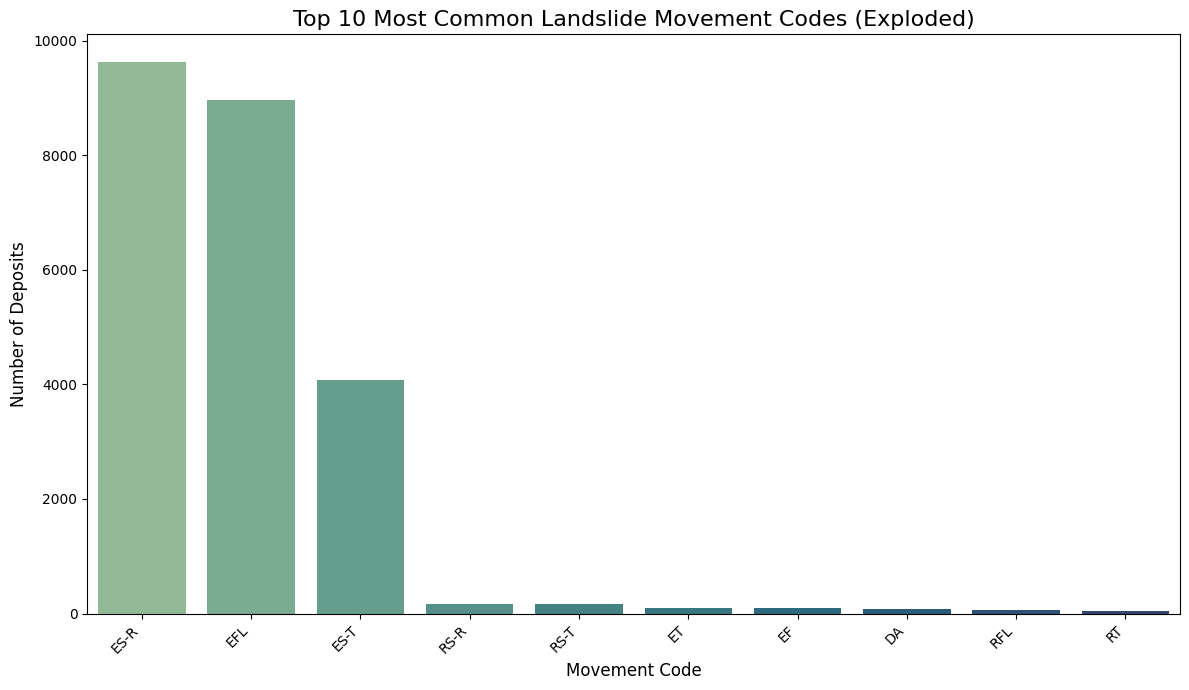

In [ ]:
# 3. Get top 10 after explosion
top10 = move_code_counts.nlargest(10)

# 4. Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top10.index, y=top10.values, palette='crest')
plt.title('Top 10 Most Common Landslide Movement Codes (Exploded)', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14171/1930670275.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='crest')


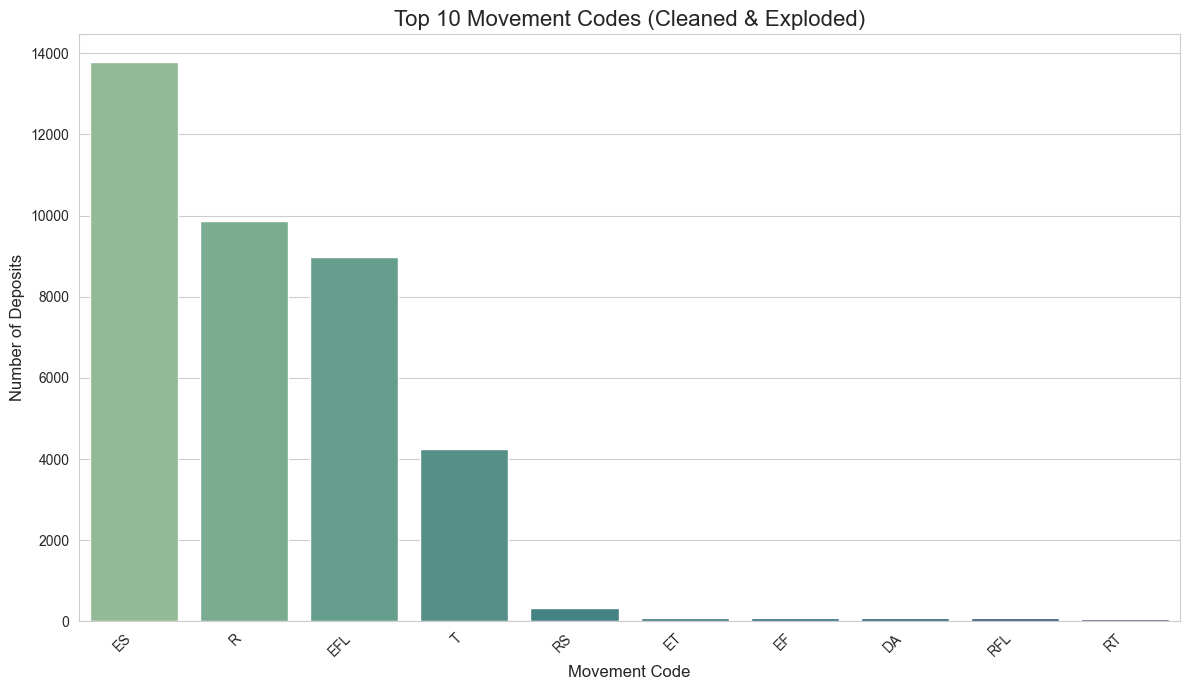

In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def normalize(code):
    # turn NaN into empty string
    if pd.isna(code):
        return ""
    s = str(code)
    # Remove any carriage‐returns or newlines
    s = re.sub(r'[\r\n]', '', s)
    # Unify all delimiters (dash, underscore, space, etc.) into '+'
    s = re.sub(r'[-_/ ]+', '+', s)
    # Collapse multiple '+' into one
    s = re.sub(r'\++', '+', s)
    # Strip leading/trailing '+'
    return s.strip('+')

deposits['MOVE_CODE_CLEAN'] = deposits['MOVE_CODE'].apply(normalize)

# Explode on '+' so each code stands alone
deposits_exploded = (
    deposits
    .assign(MOVE_CODE = deposits['MOVE_CODE_CLEAN'].str.split('+'))
    .explode('MOVE_CODE')
)

move_code_counts = deposits_exploded['MOVE_CODE'].value_counts()

top10 = move_code_counts.nlargest(10)
plt.figure(figsize=(12,7))
sns.barplot(x=top10.index, y=top10.values, palette='crest')
plt.title('Top 10 Movement Codes (Cleaned & Exploded)', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
print(move_code_counts)

MOVE_CODE
ES        13773
R          9863
EFL        8986
T          4253
RS          340
ET           90
EF           89
DA           78
RFL          71
RT           49
RA           28
EA           16
ESP          15
RF            9
RES           5
EFLEFL        3
EFLES         3
RRS           2
ESR           1
EST           1
EFLRS         1
Name: count, dtype: int64


MOVE_CODE
ES     13783
R       9871
EFL     8996
T       4254
RS       343
ET        90
EF        89
DA        78
RFL       71
RT        49
RA        28
EA        16
ESP       15
RF         9
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_14128/686628501.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='crest')


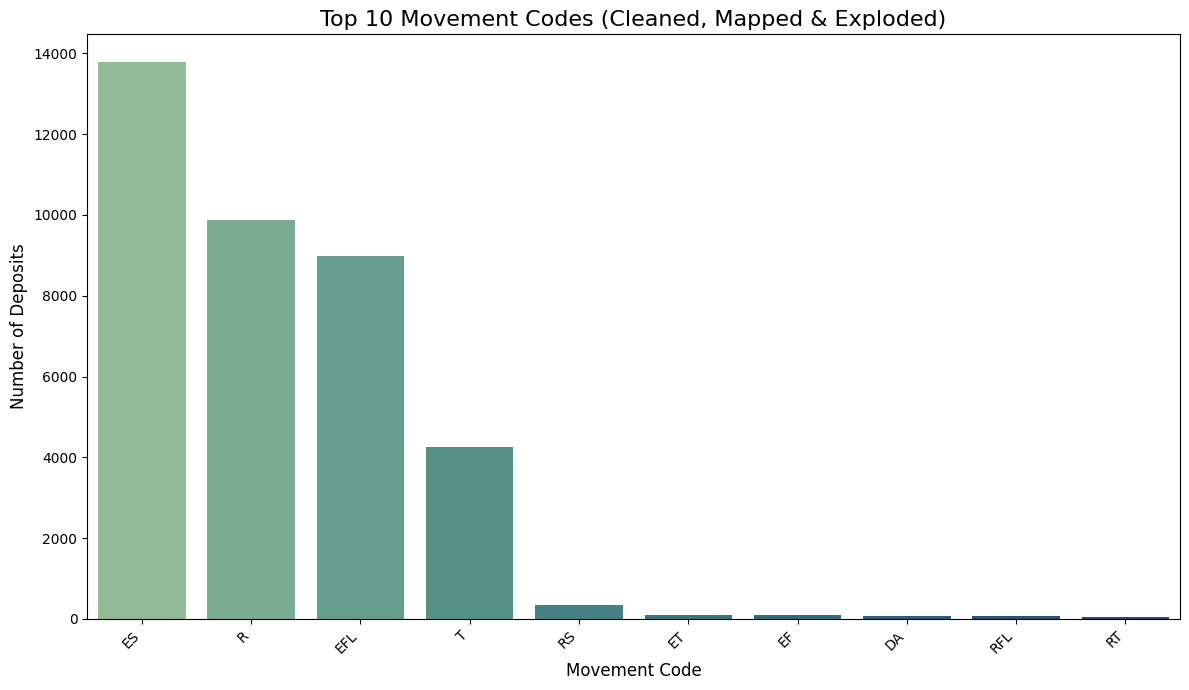

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

deposits_exploded = (
    deposits
    .assign(MOVE_CODE = deposits['MOVE_CODE_CLEAN'].str.split('+'))
    .explode('MOVE_CODE')
)

manual_map = {
    'EFLRS':    'EFL+RS',   # glue of EFL and RS
    'ESR':      'ES+R',     # missing '+'
    'EST':      'ES+T',     # ditto
    'EFLES':    'EFL+ES',   # glue of EFL and ES
    'EFLEFL':   'EFL+EFL',  # duplicate EFL
    'RES':      'R+ES',
    'RRS':      'R+RS',
}

deposits_exploded['MOVE_CODE'] = (
    deposits_exploded['MOVE_CODE']
    .replace(manual_map)        # first swap anomalies into “X+Y”
    .str.split('+')             # then split them back into lists
)

deposits_final = deposits_exploded.explode('MOVE_CODE')

final_counts = deposits_final['MOVE_CODE'].value_counts()
print(final_counts)

top10 = final_counts.nlargest(10)
plt.figure(figsize=(12,7))
sns.barplot(x=top10.index, y=top10.values, palette='crest')
plt.title('Top 10 Movement Codes (Cleaned, Mapped & Exploded)', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Confidence

In [40]:
print("\nValue counts for 'CONFIDENCE':")
print(deposits['CONFIDENCE'].value_counts())


Value counts for 'CONFIDENCE':
CONFIDENCE
Moderate (11-29)    7404
Low (1-10)          4719
High (30-40)        2937
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_48675/1460562200.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette='coolwarm')


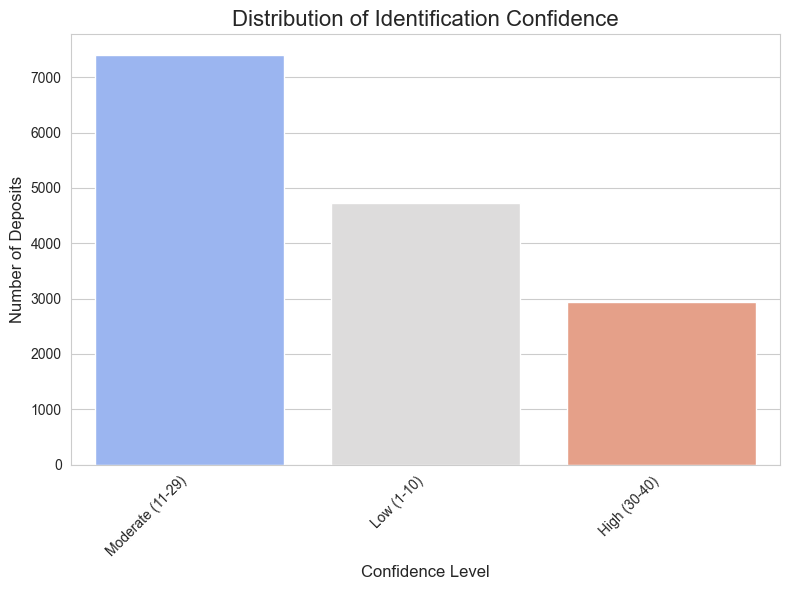

In [41]:
plt.figure(figsize=(8, 6))

# Get the value counts
confidence_counts = deposits['CONFIDENCE'].value_counts()

# Create the bar plot
sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette='coolwarm')

# Add titles and labels for clarity
plt.title('Distribution of Identification Confidence', fontsize=16)
plt.xlabel('Confidence Level', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Relative Age

In [43]:
print("\nValue counts for 'RELATIVE AGE':")
print(deposits['RELATIVE_AGE'].value_counts())


Value counts for 'RELATIVE AGE':
RELATIVE_AGE
Pre-historic (>150 years)    13892
Historic (</=150 years)       1168
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_48675/671299375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='plasma')


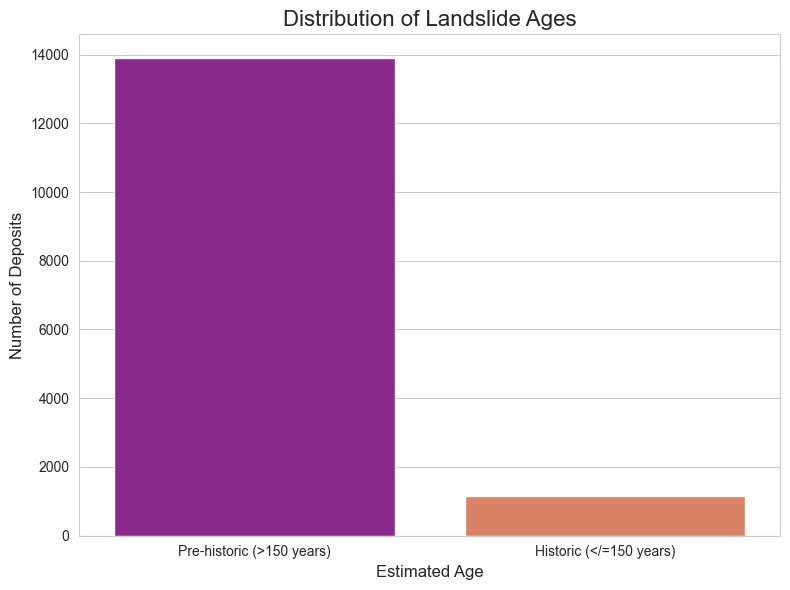

In [44]:
age_counts = deposits['RELATIVE_AGE'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=age_counts.index, y=age_counts.values, palette='plasma')

plt.title('Distribution of Landslide Ages', fontsize=16)
plt.xlabel('Estimated Age', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

### Year Move

In [46]:
print("\nValue counts for 'YEAR MOVE':")
print(deposits['YEAR_MOVE'].value_counts())
print(len(deposits['YEAR_MOVE'].unique()), "unique years")


Value counts for 'YEAR MOVE':
YEAR_MOVE
2009    100
2017     29
2006     29
2003     25
2019     20
2015     19
1990     19
2016     17
2007     15
2008     15
2000     14
2013     14
2018     13
         12
2021     10
1976     10
2002      9
1989      8
2011      7
1970      7
2012      7
2014      6
1997      4
1996      4
1950      4
1999      3
1934      3
2010      3
1972      3
1991      3
1983      3
1998      3
1977      2
1992      2
2001      2
1960      1
1980      1
2022      1
1929      1
1910      1
2005      1
1914      1
1967      1
1907      1
1958      1
1994      1
2023      1
1923      1
2020      1
Name: count, dtype: int64
50 unique years


### Display on Portal

In [47]:
print("\nValue counts for 'DISPLAY ON PORTAL':")
print(deposits['DISPLAY_ON_PORTAL'].value_counts())


Value counts for 'DISPLAY ON PORTAL':
DISPLAY_ON_PORTAL
Yes    15060
Name: count, dtype: int64


### Geometry

In [49]:
print("\nValue counts for 'Geometry':")
print(deposits['geometry'].value_counts())


Value counts for 'Geometry':
geometry
MULTIPOLYGON (EMPTY)                                 75
MULTIPOLYGON (((1042294.729 665057.398, 104229...     1
MULTIPOLYGON (((1372906.035 906459.294, 137290...     1
MULTIPOLYGON (((1079127.246 656953.117, 107912...     1
MULTIPOLYGON (((1013834.05 629658.92, 1013835....     1
                                                     ..
MULTIPOLYGON (((1225035.516 1213019.874, 12250...     1
MULTIPOLYGON (((1317666.224 140753.422, 131753...     1
MULTIPOLYGON (((1291247.844 1299997.055, 12912...     1
MULTIPOLYGON (((1267458.526 122066.123, 126747...     1
MULTIPOLYGON (((1230679.177 110818.484, 123063...     1
Name: count, Length: 14986, dtype: int64


In [50]:
deposits['geometry_type'] = deposits['geometry'].geom_type

In [51]:
print("\nValue counts for 'Geometry':")
print(deposits['geometry_type'].value_counts())


Value counts for 'Geometry':
geometry_type
MultiPolygon    15060
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_48675/1413330191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')


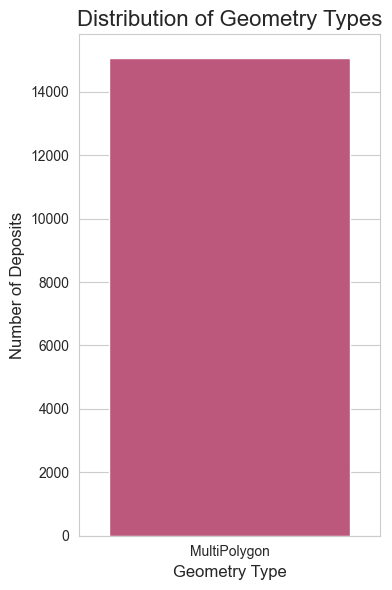

In [56]:
plt.figure(figsize=(4, 6))

geometry_counts = deposits['geometry_type'].value_counts()

# Create the bar plot
sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')

# Add titles and labels for clarity
plt.title('Distribution of Geometry Types', fontsize=16)
plt.xlabel('Geometry Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()